![avatar](http://emba.eduego.com/Uploads/Ueditor/image/20180130/1517298966389236.jpg)

# Conditional MC of Heston Model & 3/2 Model based on QE Scheme

## QE Discretization Scheme for Heston Model 

<font color=black size=3 face=times>**Main references**: <br>
         Andersen, L. (2008). Simple and efficient simulation of the Heston stochastic volatility model. *The Journal of Computational Finance, 11*(3), 1–42. https://doi.org/10.21314/JCF.2008.189 <br>
        Van Haastrecht, A., & Pelsser, A. (2010). Efficient, almost exact simulation of the heston stochastic volatility model. *International Journal of Theoretical and Applied Finance, 13*(01), 1–43. https://doi.org/10.1142/S0219024910005668 <br>
     Von Sydow, L., Milovanović, S., Larsson, E., In't Hout, K., Wiktorsson, M., Oosterlee, C. W., ... & Waldén, J. (2019). BENCHOP–SLV: the BENCHmarking project in Option Pricing–Stochastic and Local Volatility problems. *International Journal of Computer Mathematics, 96*(10), 1910-1923.
    Baldeaux, J. (2012). Exact simulation of the 3/2 model. *International Journal of Theoretical and Applied Finance, 15*(05), 1250032.

<font color=black size=3 face=times>**1.1. Notation declaration**<br>
The SDE of Heston model expressed by:
    <br/>
    \begin{align*}
    &dX(t)/X(t)=\sqrt{V(t)}dW_X(t) ,\\
    &dV(t)=\kappa(\theta-V(t))dt+\epsilon\sqrt{V(t)}dW_V(t),
    \end{align*} 
- $W_X$ and $W_V$ are scalar Brownian motions in some probability measure and assume that $dW_X(t)\dot dW_Y(t)=\rho dt$  
- $\widehat{X}$ and $\widehat{V}$ denote discrete-time approximations to $X$ and $V$, i.e. The conditional **Euler Scheme** would take the form:
 \begin{align*}
   &\widehat{V}(t+\Delta)=\widehat{V}(t)+\kappa(\theta-\widehat{V}(t)^{+})\Delta+\epsilon\sqrt{\widehat{V}(t)^{+}}Z_V\sqrt{\Delta},
    \end{align*}  
    
    And the conditional **Milstein Scheme** would take the form:
  \begin{align*}
   &\widehat{V}(t+\Delta)=\widehat{V}(t)+\kappa(\theta-\widehat{V}(t)^{+})\Delta+\epsilon\sqrt{\widehat{V}(t)^{+}}Z_V\sqrt{\Delta}+\frac{\epsilon^2}{4}\Delta(Z_V^2-1),
    \end{align*}  

<font color=black size=3 face=times>**1.2. QE Scheme**<br>
    &emsp;&emsp;For the non-central chi-square distribution approaches a Gaussian distribution as the non-centrality paremeter approaches $\infty$, but for small $V(t)$, the non-centrality parameter approaches zero, and the Gaussian variable is typically not accurate.<br>
    &emsp;&emsp;Let:
    \begin{align*}
    m&=\theta+(\widehat{V}(t)-\theta)e^{-\kappa\Delta},\tag{$1.1$}\\
    s^2&=\frac{\widehat{V}(t)\epsilon^2 e^{-\kappa\Delta}}{\kappa}(1-e^{-\kappa\Delta})+\frac{\theta\epsilon^2}{2\kappa}(1-e^{-\kappa\Delta})^2,\tag{$1.2$}\\
    \psi&\equiv s^2/m^2 =\frac{\frac{\widehat{V}(t)\epsilon^2 e^{-\kappa\Delta}}{\kappa}(1-e^{-\kappa\Delta})+\frac{\theta\epsilon^2}{2\kappa}(1-e^{-\kappa\Delta})^2}{(\theta+(\widehat{V}(t)-\theta)e^{-\kappa\Delta})^2}, \tag{$1.3$}
    \end{align*}
    &emsp;&emsp; For sufficiently large values of $\widehat{V}(t)$, we write:
    $$\widehat{V}(t+\Delta)=a(b+Z_V)^2,\tag{$1.4$}$$
    &emsp;&emsp; For low values of $\widehat{V}(t)$, we use asymptotic density and approximated density for $\widehat{V}(t+\Delta)$, we have the form:
        $$\Psi^{-1}(u)=\Psi^{-1}(u;p,\beta)=\left\{
\begin{aligned}
&0,  & 0\le u\le p \\
&\beta^{-1}ln(\frac{1-p}{1-u}),& p<u\le1.
\end{aligned},\tag{$1.5$}
\right.
$$
    &emsp;&emsp; The scheme varies when $\psi$ is big and when $\psi$ is small.<br>
    &emsp;&emsp; Assume that some arbitrary level $\psi_c\in [1,2]$ has been selected. The detailed algorithm for the QE simulation step from $\widehat{V}(t)$ to $\widehat{V}(t+\Delta)$ is then:<br>
    &emsp;&emsp;1. Given $\widehat{V}(t)$, compute $m$ and $s^2$ from the equations (1.1) and (1.2).<br>
    &emsp;&emsp;2. Compute $\psi=s^2/m^2$<br>
    &emsp;&emsp;3. Draw a uniform random number $U_V$<br>
    &emsp;&emsp;4. **If** $\psi\leq \psi_c$:<br>
    &emsp;&emsp;&emsp;&emsp;(a) Compute a and b as:
    \begin{align*}
    &b^2=2\psi^{-1}-1+\sqrt{2\psi^{-1}}\sqrt{{2\psi^{-1}-1}}\ge 0,\tag{$1.6$}\\
    &a=\frac{m}{1+b^2},\tag{$1.7$}\\
    \end{align*}
    &emsp;&emsp;&emsp;&emsp;(b) Compute $Z_V=\Phi^{-1}(U_V)$<br>
    &emsp;&emsp;&emsp;&emsp;(c) Set $\widehat{V}(t+\Delta)=a(b+Z_V)^2$<br>
    &emsp;&emsp;5.**Otherwise**, if $\psi>\psi_c$:<br>
    &emsp;&emsp;&emsp;&emsp;(a) Compute $\beta$ and $p$ as:
    \begin{align*}
    &p=\frac{\psi-1}{\psi+1}\in [0,1),\tag{$1.8$}\\
    &\beta=\frac{1-p}{m}=\frac{2}{m(\psi+1)}>0,\tag{$1.9$}\\
    \end{align*}
    &emsp;&emsp;&emsp;&emsp;(b) Set $\widehat{V}(t+\Delta)=\Psi^{-1}(U_V;p,\beta)$, where $\Psi^{-1}$ is given at (1.5)<br>
    &emsp;&emsp; After simulating the path, calculate:
\begin{align*}
     E\left(S_T|V(T),\int V(t)dt\right)&=S_0 exp\left(\frac{\rho}{\epsilon}(V(T)-V(0))-\kappa(\theta T-\int_{0}^{T}V(t)dt)\right),\tag{$1.10$}\\
     \sigma_{BS}&=\left((1-\rho^2)\int_{0}^{T}V(t)dt\right)^{\frac{1}{2}},\tag{$1.11$}\\
    \end{align*}
    &emsp;&emsp; Then bring the forward price and volatility into the BSM option pricing model.

<font color=black size=3 face=times>**1.3. TG Scheme**<br>
        &emsp;&emsp; The TG (Truncated Gaussian) Scheme writes
    $$\widehat{V}(t+\Delta)=(\mu+\sigma\dot Z_V)^{+},\tag{$1.12$}$$
    &emsp;&emsp; where $Z_V$ is a standart Gaussian random variable, and $\mu$ and $\sigma$ are constants that will depend on the time-step $\Delta$ and $\widehat{V}(t)$, as well as the parameters in the SDE for $V$.<br>
    &emsp;&emsp; Define the ratio $r=\mu/\sigma$, match the mean to $m$ results in:
    $$\mu=\frac{m}{r^{-1}\phi(r)+\Phi(r)};\quad \sigma=r^{-1}\mu=\frac{m}{\phi(r)+r\Phi(r)}$$
    &emsp;&emsp; where $\phi$ is pdf of normal distribution and $\Phi$ is cdf of normal distribution.
    \begin{align*}
    &\mu=f_{\mu}(\psi)\cdot m,\quad f_{\mu}(\psi)=\frac{r(\psi)}{\phi(r(\psi))+r(\psi)\Phi(r(\psi))},\tag{$1.13$}\\
    &\sigma=f_{\sigma}(\psi)\cdot s,\quad f_{\sigma}(\psi)=\frac{\psi^{-1/2}}{\phi(r(\psi))+r(\psi)\Phi(r(\psi))},\tag{$1.14$}
    \end{align*}
    &emsp;&emsp;The detailed algorithm for the TG simulation step from $\widehat{V}(t)$ to $\widehat{V}(t+\Delta)$ is as follows:<br>
    &emsp;&emsp;1.Given $\widehat{V}(t)$, compute $m$ and $s^2$ from (1.1) and (1.2).<br>
    &emsp;&emsp;2.Compute $\psi=s^2/m^2$ and look up $f_{\mu}(\psi)$ and $f_{\sigma}(\psi)$ from cache<br>
    &emsp;&emsp;3.Compute $\mu$ and $\sigma$ according to equations (1.13) and (1.14)<br>
    &emsp;&emsp;4.Compute $Z_V=\Phi^{-1}(U_V)$<br>
    &emsp;&emsp;5.Set $\widehat{V}(t+\Delta)=(\mu+\sigma\dot Z_V)^{+}$

<font color=black size=3 face=times>**1.4. General discrete-time approximation schemes**<br>
    &emsp;&emsp;<font color=black size=3 face=times>**Kahl-Jackel Scheme**<br>
    &emsp;&emsp;Using implicit Milstein scheme to discretize the V-process and "IJK" discretization for the stock process:
    \begin{align*}
    ln\widehat{X}(t+\Delta)&=ln\widehat{X}(t)-\frac{\Delta}{4}(\widehat{V}(t+\Delta)+\widehat{V}(t))+\rho\sqrt{\widehat{V}(t)}Z_V\sqrt{\Delta}+\frac{1}{2}\left(\sqrt{\widehat{V}(t+\Delta)}+\sqrt{\widehat{V}(t)}\right)(Z_X\sqrt{\Delta}-\rho Z_V\sqrt{\Delta})+\frac{1}{4}\epsilon\rho\Delta(Z_V^2-1),\tag{$1.15$}\\
    \widehat{V}(t+\Delta) &= \frac{\widehat{V}(t)+\kappa\theta\Delta+\epsilon\sqrt{\widehat{V}(t)}Z_V\sqrt{\Delta}+\frac{1}{4}\epsilon^2\Delta(Z_V^2-1)}{1+\kappa\Delta}, \tag{$1.16$}
    \end{align*}
    <br/>
    &emsp;&emsp;<font color=black size=3 face=times>**Broadie-Kaya Scheme**<br>
    &emsp;&emsp;$V(t),V(t+\Delta)$ are sampled directly from the known conditional distribution of $V(t)$ and $lnX(t),lnX(t+\Delta)$ are from Gaussian distribution. 
\begin{align*}
    V(t+\Delta)&=V(t)+\int_{t}^{t+\Delta}\kappa(\theta-V(u))du+\epsilon \int_{t}^{t+\Delta}\sqrt{V(u)}dW_V(u) ,\tag{$1.17$}\\
    lnX(t+\Delta)&=lnX(t)+\frac{\rho}{\epsilon}(V(t+\Delta)-V(t)-\kappa\theta\Delta)+(\frac{\kappa\rho}{\epsilon}-\frac{1}{2})\int_{t}^{t+\Delta}V(u)du+\sqrt{1-\rho^2}\int_{t}^{t+\Delta}\sqrt{V(u)}dW(u), \tag{$1.18$}
    \end{align*}

In [32]:
import numpy as np
import pandas as pd
import heston_cmc_qe as heston
import time
import pyfeng as pf
from tqdm import tqdm

## Andersen's (2008) and Van's (2010) Heston model examples

In [33]:
# Examples with multiple strikes and single spot
# Andersen (2008)
strike = [100.0, 140.0, 70.0]
forward = 100
delta = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
case = np.zeros([3, 7])
#case[i]=[vov, kappa, rho, texp, theta,  sigma,     r]
case[0] = [1,   0.5, -0.9, 10, 0.04, np.sqrt(0.04), 0]
case[1] = [0.9, 0.3, -0.5, 15, 0.04, np.sqrt(0.04), 0]
case[2] = [1,   1,   -0.3, 5,  0.09, np.sqrt(0.09), 0]

In [34]:
# Van (2010)
strike = [100.0, 140.0, 60.0]
forward = 100
delta = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
case = np.zeros([3, 7])
#case[i]=[vov, kappa, rho, texp, theta,   sigma,    r]
case[0] = [1,   0.5, -0.9, 10, 0.04, np.sqrt(0.04), 0]
case[1] = [1,   1,   -0.3, 5,  0.09, np.sqrt(0.09), 0.05]
case[2] = [0.9, 0.3, -0.5, 15, 0.04, np.sqrt(0.04), 0]
ref_price = np.array([[13.085, 0.296, 44.330], [33.597, 18.157, 56.575], [16.649, 5.138, 45.287]])

In [35]:
price_cmc = np.zeros([case.shape[0], len(delta), len(strike)])
bias_cmc = np.zeros_like(price_cmc)

### Compute price and bias

When path=1e6, computation is time-consuming (especially for texp=15), separate the three cases to get stable computation

In [5]:
# Compare with QE-M method result given by Van (2010)
i = 0
vov, kappa, rho, texp, theta, sigma, r = case[i]

start = time.time()
heston_cmc_qe = heston.HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)

for d in range(len(delta)):
    price_cmc[i, d, :] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e6, seed=123456)
    bias_cmc[i, d, :] = price_cmc[i, d, :] - ref_price[i, :]

end = time.time()

print('Case %s:\n' % i + 'price')
print(price_cmc[i, :, :])
print('bias')
np.set_printoptions(suppress=True)
print(bias_cmc[i, :, :])
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 0:
computed price
[[14.52988166  0.1954481  45.5566836 ]
 [13.58264697  0.26538629 44.59576156]
 [13.18875382  0.29164219 44.35693654]
 [13.09245767  0.29643382 44.32630416]
 [13.09234981  0.29612097 44.3554616 ]
 [13.0747208   0.29571157 44.30422413]]
bias
[[ 1.44488166 -0.1005519   1.2266836 ]
 [ 0.49764697 -0.03061371  0.26576156]
 [ 0.10375382 -0.00435781  0.02693654]
 [ 0.00745767  0.00043382 -0.00369584]
 [ 0.00734981  0.00012097  0.0254616 ]
 [-0.0102792  -0.00028843 -0.02577587]]
Running time is 1239.845 seconds.



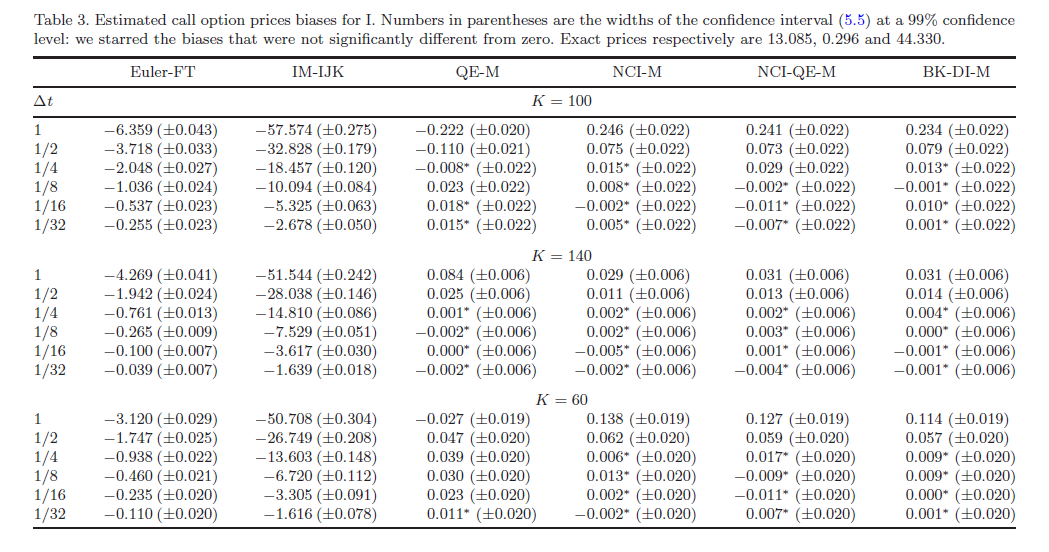

In [6]:
i = 1
vov, kappa, rho, texp, theta, sigma, r = case[i]

start = time.time()
heston_cmc_qe = heston.HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)

for d in range(len(delta)):
    price_cmc[i, d, :] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e6, seed=123456)
    bias_cmc[i, d, :] = price_cmc[i, d, :] - ref_price[i, :]

end = time.time()

print('Case %s:\n' % i + 'price')
print(price_cmc[i, :, :])
print('bias')
print(bias_cmc[i, :, :])
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 1:
computed price
[[33.73639816 17.45658862 56.93686071]
 [33.6862614  17.7939801  56.72279494]
 [33.62950685 18.06468289 56.61902551]
 [33.60258667 18.14381343 56.57858711]
 [33.59659541 18.15261599 56.57703292]
 [33.59741061 18.15529961 56.5780489 ]]
bias
[[ 0.13939816 -0.70041138  0.36186071]
 [ 0.0892614  -0.3630199   0.14779494]
 [ 0.03250685 -0.09231711  0.04402551]
 [ 0.00558667 -0.01318657  0.00358711]
 [-0.00040459 -0.00438401  0.00203292]
 [ 0.00041061 -0.00170039  0.0030489 ]]
Running time is 681.720 seconds.



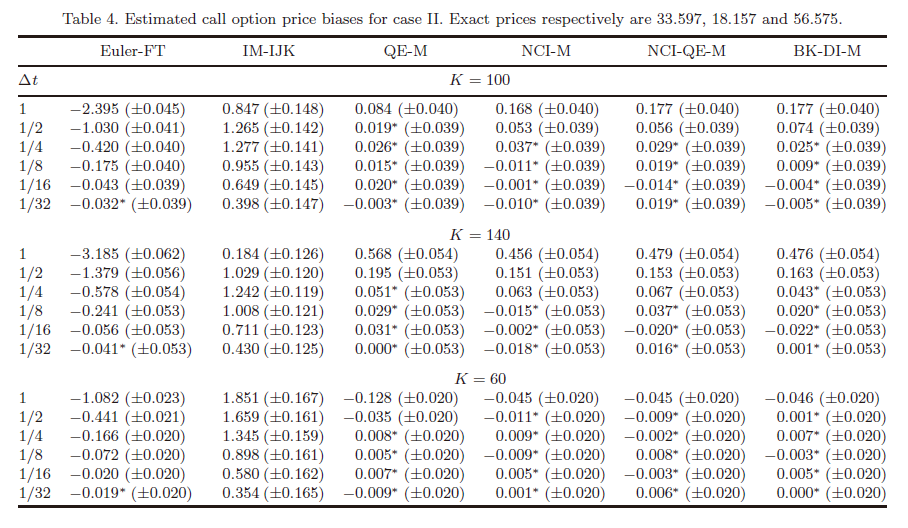

In [32]:
# take quite a long time to compute when path=1e6, try 1e5 first
i = 2
vov, kappa, rho, texp, theta, sigma, r = case[i]

start = time.time()
heston_cmc_qe = heston.HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)

for d in range(len(delta)):
    price_cmc[i, d, :] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_cmc[i, d, :] = price_cmc[i, d, :] - ref_price[i, :]

end = time.time()

print('Case %s:\n' % i + 'price')
print(price_cmc[i, :, :])
print('bias')
print(bias_cmc[i, :, :])
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 2:
computed price
[[16.14957874  4.76025232 45.57843546]
 [16.4168519   5.03174927 45.37411979]
 [16.61786281  5.14344251 45.32220412]
 [16.64846896  5.14132547 45.30859454]
 [16.67691989  5.15529418 45.32730755]
 [16.64978732  5.12726313 45.32411027]]
bias
[[-0.49942126 -0.37774768  0.29143546]
 [-0.2321481  -0.10625073  0.08711979]
 [-0.03113719  0.00544251  0.03520412]
 [-0.00053104  0.00332547  0.02159454]
 [ 0.02791989  0.01729418  0.04030755]
 [ 0.00078732 -0.01073687  0.03711027]]
Running time is 133.427 seconds.



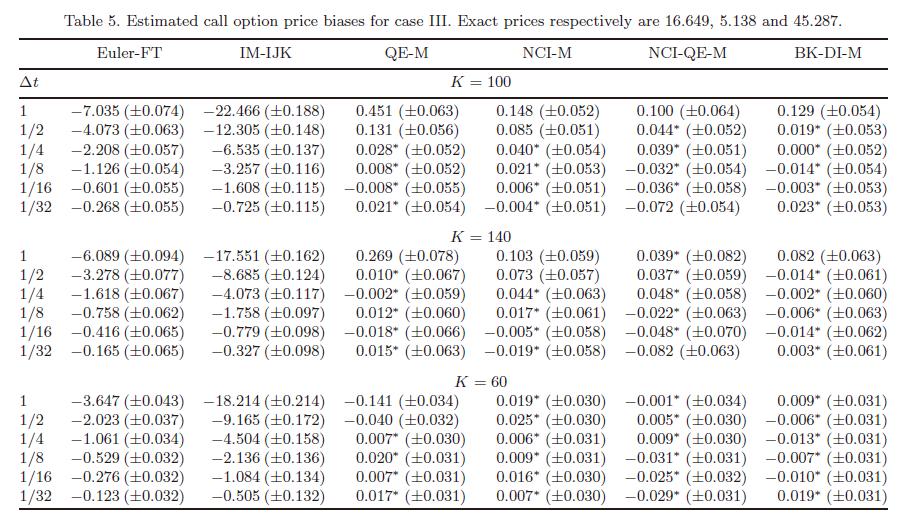

### Compute std error of price

In [8]:
n = 50
for i in range(case.shape[0]):
    start = time.time()
    vov, kappa, rho, texp, theta, sigma, r = case[i]

    heston_cmc_qe = heston.HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    price_cmc = np.zeros([n, len(delta), len(strike)])
    for j in tqdm(range(n)):
        for d in range(len(delta)):
            price_cmc[j, d, :] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e4)
            
    end = time.time()
    print('Case %s:' % i)
    print('computed price')
    print(price_cmc.mean(axis=0))
    print('std error of price')
    print(price_cmc.std(axis=0))
    print('Running time is %.3f seconds.' % (end - start) + '\n')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [08:15<00:00,  9.92s/it]


Case 0:
computed price
[[14.5203858   0.19509451 45.52203955]
 [13.58136981  0.26529004 44.59468135]
 [13.19609127  0.29187395 44.37059131]
 [13.09018819  0.29703984 44.33355136]
 [13.07406605  0.29696865 44.32439902]
 [13.09832797  0.29585805 44.37110991]]
std error of conditional MC
[[0.08852271 0.00213495 0.21807294]
 [0.08330737 0.00297587 0.19164552]
 [0.09267493 0.00287989 0.2265294 ]
 [0.07733342 0.00215729 0.20412114]
 [0.08064352 0.00247084 0.21281211]
 [0.0833296  0.00249145 0.20760677]]
Running time is 496.367 seconds.



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:29<00:00,  5.39s/it]


Case 1:
computed price
[[33.73147729 17.46024923 56.91830707]
 [33.66953472 17.78586023 56.68978114]
 [33.61313031 18.05692271 56.59042084]
 [33.6088894  18.13794643 56.59842828]
 [33.60424631 18.161567   56.58718949]
 [33.59115304 18.16558111 56.55645369]]
std error of conditional MC
[[0.04781501 0.03737528 0.10749406]
 [0.05483284 0.0346728  0.12074765]
 [0.05173381 0.04028025 0.12492807]
 [0.0524559  0.03855589 0.10787887]
 [0.05449511 0.03000034 0.11958618]
 [0.05609015 0.04441259 0.12018084]]
Running time is 269.295 seconds.



100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [12:41<00:00, 15.24s/it]


Case 2:
computed price
[[16.1383193   4.76316836 45.52326353]
 [16.44624442  5.06940902 45.35128819]
 [16.60917412  5.14335922 45.29290186]
 [16.64953119  5.14682309 45.2867721 ]
 [16.66243944  5.1412643  45.31990055]
 [16.65227454  5.14796606 45.26376083]]
std error of conditional MC
[[0.04599494 0.05836611 0.10952485]
 [0.03766147 0.05338242 0.10951823]
 [0.03722262 0.04141417 0.1002134 ]
 [0.04465307 0.04900011 0.09765122]
 [0.04190097 0.04429235 0.11276059]
 [0.04286761 0.04579411 0.0936633 ]]
Running time is 762.000 seconds.



### Compare the model with {Conditional MC with other Discretization Schemes, Exact MC, Almost Exact MC}

In [36]:
# from comparison import heston_exact
# from comparison import heston_ae as heston_mc_ae

In [39]:
delta = 1/32
path = int(1e4)
n_comp = 5
price_comp = pd.DataFrame(np.zeros([len(strike), n_comp]), index=strike, columns=['QE', 'TG', 'Euler', 'Milstein', 'KJ'])
bias_comp = pd.DataFrame(np.zeros([len(strike), n_comp]), index=strike, columns=['QE', 'TG', 'Euler', 'Milstein', 'KJ'])

In [40]:
for i in range(case.shape[0]):
    vov, kappa, rho, texp, theta, sigma, r = case[i]
    
    start = time.time()
    heston_cmc_qe = heston.HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
#     heston_ae = heston_mc_ae.HestonMCAe(vov, kappa, rho, theta, r)
#     heston_exact = 
    
    price_comp['QE'] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='QE')
    bias_comp['QE'] = price_comp['QE'] - ref_price[i, :]
    
    # TG scheme NEED to be MODIFIED
    price_comp['TG'] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='TG')
    bias_comp['TG'] = price_comp['TG'] - ref_price[i, :]
    
    price_comp['Euler'] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='Euler')
    bias_comp['Euler'] = price_comp['Euler'] - ref_price[i, :]
    
    price_comp['Milstein'] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='Milstein')
    bias_comp['Milstein'] = price_comp['Milstein'] - ref_price[i, :]
    
    price_comp['KJ'] = heston_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='KJ')
    bias_comp['KJ'] = price_comp['KJ'] - ref_price[i, :]

    end = time.time()
    
    print('Case %s:' % i)
    print(bias_comp)
    print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 0:
             QE        TG     Euler  Milstein         KJ
100.0 -0.096580  2.000897  0.988963  2.238248  -8.732126
140.0  0.000031  0.018970 -0.020186 -0.090837   0.121652
60.0  -0.239033  5.967015  0.694151  2.058638 -18.327410
Running time is 98.795 seconds.

Case 1:
             QE        TG      Euler   Milstein        KJ
100.0 -0.084010  1.105204   4.173896   4.381048 -0.114112
140.0 -0.021390 -0.964267  -4.312867  -5.598503  2.654734
60.0  -0.173565  3.434577  10.075882  10.225771 -2.746308
Running time is 35.962 seconds.

Case 2:
             QE        TG     Euler  Milstein        KJ
100.0 -0.016552 -0.189795  0.959258  0.036758  5.209727
140.0 -0.014516 -1.248058  1.583381  0.782602  7.101119
60.0  -0.003585  3.014723 -1.136084 -1.199854 -4.969506
Running time is 200.493 seconds.



In [ ]:
# exact mc to be added
# almost exact mc to be checked

## Von's (2008) Heston model example

In [ ]:
# Example with multiple spots and single strike
# Von (2018), multiple forward, single strike
strike = [100.0]
forward = [75, 100, 125]
delta = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
case = np.zeros([3, 7])
vov = 1
kappa = 2.58
rho = -0.36
texp = 1
theta = 0.043
sigma = np.sqrt(0.114)
r = 0
ref_price = np.array([0.908502728459621, 9.046650119220969, 28.514786399298796])

In [26]:
# compute conditional mc price and bias
# for cases with single strike and multiple forward
price_cmc = np.zeros([len(delta), len(forward)])
bias_cmc = np.zeros([len(delta), len(forward)])
start = time.time()
for i in range(len(forward)):
    heston_cmc_qe = heston.HestonCondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    
    for d in range(len(delta)):
        price_cmc[d, i] = heston_cmc_qe.price(strike, forward[i], texp, sigma=sigma, delta=delta[d], intr=r, path=1e6, seed=123456)
        bias_cmc[d, i] = price_cmc[d, i] - ref_price[i]

end = time.time()
np.set_printoptions(suppress=True)
print('price')
print(price_cmc)
print('bias')
print(bias_cmc)
print('Running time is %.3f seconds.' % (end - start) + '\n')

price:
[[ 1.27319137  9.70410464 27.35193984]
 [ 0.83996433  8.9707479  28.63384499]
 [ 0.89533596  8.9907661  28.59657732]
 [ 0.90615288  9.03174875 28.54093534]
 [ 0.90845173  9.04386541 28.52525734]
 [ 0.90900531  9.04605687 28.51204355]]
bias:
[[ 0.36468864  0.65745452 -1.16284656]
 [-0.0685384  -0.07590222  0.11905859]
 [-0.01316676 -0.05588402  0.08179092]
 [-0.00234985 -0.01490137  0.02614895]
 [-0.000051   -0.00278471  0.01047094]
 [ 0.00050258 -0.00059325 -0.00274285]]
Running time is 385.310 seconds.



# Conditional MC of 3/2 Model based on QE Scheme

## QE Discretization Scheme for 3/2 Model 

<font color=black size=3 face=times>**2.1.Derive 3/2 model from heston model**: <br>
    &emsp;&emsp;The stock price and volatility can be written as:
    \begin{align*}
    &dv_t=\kappa v_t(\theta-v_t)dt+\nu v_t^{3/2}dZ_t,\tag{$2.1$}\\
    &\frac{dS_t}{S_t}=\sigma_t dW_t=\sigma_t(\rho dZ_t+\rho_{*}dX_t),\tag{$2.2$}\\
    \end{align*}
&emsp;&emsp;where $\rho_{*}=\sqrt{1-\rho^2},v_t=\sigma_t^2$<br>
    &emsp;&emsp;Changing variable $x_t=1/v_t$, then we have:
    $$dx_t=-\frac{dv_t}{v_t^2}+\frac{(dv_t)^2}{v_t^3}=(\kappa+\nu^2-\kappa\theta x_t)dt-\nu \sqrt{x_t}dZ_t,\tag{$2.3$}$$
    &emsp;&emsp;Then it's equal to Heston model with new parameters:
    $$\nu^{'}=-\nu,\quad\kappa^{'}=\kappa \theta,\quad\text{and} \quad\theta^{'}=(\kappa+\nu^2)/(\kappa\theta)$$
   &emsp;&emsp; We can calculate $S_T$ by:
   \begin{align*}
    dln(X_t)&=\left(\frac{\kappa+\nu^2/2}{x_t}-\kappa\theta\right)dt-\frac{\nu}{\sqrt{x_t}}dZ_t,\tag{$2.4$}\\
    \int_{0}^{T}\frac{1}{\sqrt{x_t}}dZ_t&=\frac{1}{\nu}\left(log\left(\frac{x_0}{x_T}\right)+(\kappa+\frac{\nu^2}{2})V_T-\kappa\theta T\right),\tag{$2.5$}\\
    log\left(\frac{S_T}{S_0}\right)&=\frac{\rho}{\nu}-\kappa(T\theta-\left(1+\frac{\nu^2}{2\kappa}V_T\right))-\frac{1}{2}V_T+\rho_{*}\sqrt{V_T}U
    \end{align*} 
    &emsp;&emsp;Where $V_T=\int_{0}^{T}v_tdt$ and $U \sim N(0,1)$<br>
    &emsp;&emsp;Then we calculate:
    \begin{align*}
    E\left(S_T|v_T,V_T\right)&=S_0exp\left(\frac{\rho}{\nu}\left(log(\frac{V_T}{V_0})-\kappa\left(T\theta-(1+\frac{\nu^2}{2\kappa})V_T)\right)\right)-\frac{1}{2}\rho^2V_T\right),\tag{$2.6$}\\
    \sigma_{BS}&=\left((1-\rho^2)V_T\right)^{\frac{1}{2}},\tag{$2.7$}
    \end{align*} 
    &emsp;&emsp; Finally, bring the forward price and volatility into the BSM option pricing model.

In [41]:
import numpy as np
import pandas as pd
import sv32_cmc_qe as sv32
import time
import pyfeng as pf
from tqdm import tqdm

## IRO et al.'s (2020) 3/2 model example

In [43]:
# IRO et al(2020)
strike = [95.0, 100, 105]
forward = 100
delta = [1/32, 1/64, 1/128, 1/256, 1/512, 1/1024]

case = np.zeros([4, 7])
#case[i]=[vov,   kappa,  rho,  texp, theta,    sigma,      r]
case[0] = [8.56, 22.84, -0.99, 0.5,  0.218, np.sqrt(0.06), 0]
case[1] = [8.56, 18.32, -0.99, 0.5,  0.218, np.sqrt(0.06), 0]
case[2] = [3.20, 19.76, -0.99, 0.5,  0.218, np.sqrt(0.06), 0]
case[3] = [3.20, 20.48, -0.99, 0.5,  0.218, np.sqrt(0.06), 0]
ref_price=np.array([[10.364, 7.386, 4.938], [10.055, 7.042, 4.586], [11.657, 8.926, 6.636], [11.724, 8.999, 6.710]])

In [44]:
price_sv32 = np.zeros([case.shape[0], len(delta), len(strike)])
bias_sv32 = np.zeros_like(price_sv32)

### Compute price and bias

In [13]:
i = 0
vov, kappa, rho, texp, theta, sigma, r = case[i]
start = time.time()
sv32_cmc_qe = sv32.Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32[i, d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32[i, d, :] = price_sv32[i, d, :] - ref_price[i, :]
end = time.time()

print('Case %s:\n' % i + 'price')
print(price_sv32[i, :, :])
print('bias')
print(bias_sv32[i, :, :])
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 0:
price
[[10.41183824  7.43394029  4.98175997]
 [10.39500516  7.41570618  4.96871733]
 [10.32858465  7.36215638  4.92025649]
 [10.32372393  7.3560969   4.91538734]
 [10.36738945  7.38872259  4.93984962]
 [10.37036996  7.38954685  4.93931218]]
bias
[[ 0.04783824  0.04794029  0.04375997]
 [ 0.03100516  0.02970618  0.03071733]
 [-0.03541535 -0.02384362 -0.01774351]
 [-0.04027607 -0.0299031  -0.02261266]
 [ 0.00338945  0.00272259  0.00184962]
 [ 0.00636996  0.00354685  0.00131218]]
Running time is 39.874 seconds.



In [14]:
i = 1
vov, kappa, rho, texp, theta, sigma, r = case[i]
start = time.time()
sv32_cmc_qe = sv32.Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32[i, d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32[i, d, :] = price_sv32[i, d, :] - ref_price[i, :]
end = time.time()

print('Case %s:\n' % i + 'price')
print(price_sv32[i, :, :])
print('bias')
print(bias_sv32[i, :, :])
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 1:
price
[[10.09257913  7.08056223  4.62232473]
 [10.08344707  7.06866654  4.61425175]
 [10.02091575  7.01996362  4.57047996]
 [10.0163113   7.01351819  4.5657189 ]
 [10.05813768  7.044595    4.58844769]
 [10.06001436  7.04404277  4.58666046]]
bias
[[ 0.03757913  0.03856223  0.03632473]
 [ 0.02844707  0.02666654  0.02825175]
 [-0.03408425 -0.02203638 -0.01552004]
 [-0.0386887  -0.02848181 -0.0202811 ]
 [ 0.00313768  0.002595    0.00244769]
 [ 0.00501436  0.00204277  0.00066046]]
Running time is 40.427 seconds.



In [15]:
i = 2
vov, kappa, rho, texp, theta, sigma, r = case[i]
start = time.time()
sv32_cmc_qe = sv32.Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32[i, d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32[i, d, :] = price_sv32[i, d, :] - ref_price[i, :]
end = time.time()

print('Case %s:\n' % i + 'price')
print(price_sv32[i, :, :])
print('bias')
print(bias_sv32[i, :, :])
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 2:
price
[[11.68988767  8.96060401  6.67226082]
 [11.69516771  8.96499449  6.67706834]
 [11.61303073  8.89224011  6.61073918]
 [11.60699852  8.88638241  6.60427352]
 [11.66329403  8.93288747  6.64119845]
 [11.67240993  8.94013504  6.64691605]]
bias
[[ 0.03288767  0.03460401  0.03626082]
 [ 0.03816771  0.03899449  0.04106834]
 [-0.04396927 -0.03375989 -0.02526082]
 [-0.05000148 -0.03961759 -0.03172648]
 [ 0.00629403  0.00688747  0.00519845]
 [ 0.01540993  0.01413504  0.01091605]]
Running time is 42.247 seconds.



In [16]:
i = 3
vov, kappa, rho, texp, theta, sigma, r = case[i]
start = time.time()
sv32_cmc_qe = sv32.Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32[i, d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32[i, d, :] = price_sv32[i, d, :] - ref_price[i, :]
end = time.time()

print('Case %s:\n' % i + 'price')
print(price_sv32[i, :, :])
print('bias')
print(bias_sv32[i, :, :])
print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 3:
price
[[11.75813915  9.03412634  6.74734939]
 [11.76278444  9.03800963  6.7517485 ]
 [11.67967863  8.96424171  6.68448822]
 [11.67363534  8.9583579   6.677912  ]
 [11.73038248  9.00534362  6.71530174]
 [11.73987663  9.01294811  6.7213301 ]]
bias
[[ 0.03413915  0.03512634  0.03734939]
 [ 0.03878444  0.03900963  0.0417485 ]
 [-0.04432137 -0.03475829 -0.02551178]
 [-0.05036466 -0.0406421  -0.032088  ]
 [ 0.00638248  0.00634362  0.00530174]
 [ 0.01587663  0.01394811  0.0113301 ]]
Running time is 42.243 seconds.



### Compute std error of price

In [ ]:
# compute std error of conditional mc price
n = 50
for i in range(case.shape[0]):
    start = time.time()
    vov, kappa, rho, texp, theta, sigma, r = case[i]

    sv32_cmc_qe = sv32.Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    price_sv32 = np.zeros([len(delta), len(strike), n])
    for j in range(n):
        for d in range(len(delta)):
            price_sv32[d, :, j] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e4)

    end = time.time()
    np.set_printoptions(suppress=True)
    print('Case %s:' % i)
    print(price_sv32.mean(axis=2))
    print(price_sv32.std(axis=2))
    print('Running time is %.3f seconds.' % (end - start) + '\n')

### Compare the model with {Conditional MC with other Discretization Schemes, Exact MC, Almost Exact MC}

In [45]:
delta = 1/512
path = int(1e4)
n = 5
price = pd.DataFrame(np.zeros([len(strike), n]), index=strike, columns=['QE', 'TG', 'Euler', 'Milstein', 'KJ'])
bias = pd.DataFrame(np.zeros([len(strike), n]), index=strike, columns=['QE', 'TG', 'Euler', 'Milstein', 'KJ'])

for i in range(case.shape[0]):
    vov, kappa, rho, texp, theta, sigma, r = case[i]
    
    start = time.time()
    sv32_cmc_qe = sv32.Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
    
    price['QE'] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='QE')
    bias['QE'] = price['QE'] - ref_price[i, :]
    
    # TG scheme NEED to be MODIFIED
    price['TG'] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='TG')
    bias['TG'] = price['TG'] - ref_price[i, :]
    
    price['Euler'] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='Euler')
    bias['Euler'] = price['TG'] - ref_price[i, :]
    
    price['Milstein'] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='Milstein')
    bias['Milstein'] = price['Milstein'] - ref_price[i, :]
    
    price['KJ'] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta, intr=r, path=path, seed=123456, scheme='KJ')
    bias['KJ'] = price['KJ'] - ref_price[i, :]

    end = time.time()
    
    print('Case %s:' % i)
    print(bias)
    print('Running time is %.3f seconds.' % (end - start) + '\n')

Case 0:
             QE  TG  Euler  Milstein  KJ
95.0   0.043647 NaN    NaN       NaN NaN
100.0  0.043675 NaN    NaN       NaN NaN
105.0  0.043558 NaN    NaN       NaN NaN
Running time is 55.086 seconds.

Case 1:
             QE  TG  Euler  Milstein  KJ
95.0   0.042839 NaN    NaN       NaN NaN
100.0  0.042875 NaN    NaN       NaN NaN
105.0  0.043560 NaN    NaN       NaN NaN
Running time is 55.514 seconds.

Case 2:
             QE  TG  Euler  Milstein  KJ
95.0   0.075226 NaN    NaN       NaN NaN
100.0  0.071784 NaN    NaN       NaN NaN
105.0  0.063970 NaN    NaN       NaN NaN
Running time is 58.917 seconds.

Case 3:
             QE  TG  Euler  Milstein  KJ
95.0   0.075616 NaN    NaN       NaN NaN
100.0  0.071546 NaN    NaN       NaN NaN
105.0  0.064396 NaN    NaN       NaN NaN
Running time is 58.409 seconds.



In [ ]:
# exact MC & almost exact MC to be added

## Baldeaux's (2012) 3/2 model example

In [46]:
strike = [1.0]
forward = 1
delta = [1/32, 1/64, 1/128, 1/256, 1/512, 1/1024]
vov, kappa, rho, texp, theta, sigma, r = [0.2,  2,  -0.5,  1,    1.5,    1,  0.05]
ref_price = 0.443059

In [47]:
price_sv32 = np.zeros([len(delta), len(strike)])
bias_sv32 = np.zeros_like(price_sv32)

### Compute price and bias

In [48]:
start = time.time()
sv32_cmc_qe = sv32.Sv32CondMcQE(vov=vov, kappa=kappa, rho=rho, theta=theta)
for d in range(len(delta)):
    price_sv32[d, :] = sv32_cmc_qe.price(strike, forward, texp, sigma=sigma, delta=delta[d], intr=r, path=1e5, seed=123456)
    bias_sv32[d, :] = price_sv32[d, :] - ref_price
end = time.time()

print('price')
print(price_sv32)
print('bias')
print(bias_sv32)
print('Running time is %.3f seconds.' % (end - start) + '\n')

price
[[0.4447258 ]
 [0.44195863]
 [0.4416111 ]
 [0.44310568]
 [0.44365994]
 [0.44196695]]
bias
[[ 1.66680183e-03]
 [-1.10037351e-03]
 [-1.44790377e-03]
 [ 4.66823942e-05]
 [ 6.00938529e-04]
 [-1.09204636e-03]]
Running time is 76.019 seconds.

